
Python was not able to load the fast fortran material routines.



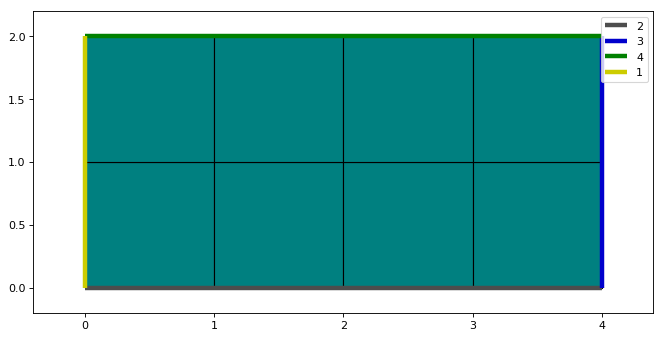

In [1]:
# importing lib and setting a list of meshes to be tested
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
import pandas as pd
%matplotlib inline 

msh_dict = {}
msh_dict[0] = amfe.amfe_dir('meshes/test_meshes/1_rectangle_8_elem.msh')
msh_dict[1] = mshfile = amfe.amfe_dir('meshes/test_meshes/1_rectangle_2_elem.msh')



domain_id = {}
domain_id[0] = 6
domain_id[1] = 6

# select mesh to be plotted
mesh_id1 = 0
mshfile = msh_dict[mesh_id1]

m1 = amfe.Mesh()
m1.import_msh(mshfile)

fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_mesh(m1,ax1)
plt.show()

In [2]:
#creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

value = 1e8
my_comp = amfe.MechanicalSystem()
my_comp.set_mesh_obj(m1)
my_comp.set_domain(6,my_material)
my_comp.apply_dirichlet_boundaries(1, 'xy')
my_comp.apply_neumann_boundaries(3, value, 'normal')
s = amfe.LinearStaticsSolver(my_comp)
s.solve()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_system_solution(my_comp, factor=scale, ax = ax1)
    plt.show()
    
interact(plot_static,scale=(0,200,10))  

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 8 elements and 30 dofs.
Time taken for preallocation: 0.00 seconds.
Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...
Start solving linear static problem...
Static problem solved.


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\sparse\sputils.py:115: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


interactive(children=(IntSlider(value=1, description='scale', max=200, step=10), Output()), _dom_classes=('wid…

<function __main__.plot_static(scale=1)>

In [3]:
my_comp.u_output[1]

array([ 0.00000000e+00,  0.00000000e+00,  1.88550475e-02,  1.42679198e-03,
        1.88550475e-02, -1.42679198e-03,  0.00000000e+00,  0.00000000e+00,
        4.71427131e-03,  1.47246263e-03,  9.33251220e-03,  1.46061914e-03,
        1.40908040e-02,  1.42880215e-03,  1.88567871e-02, -1.55070186e-16,
        1.40908040e-02, -1.42880215e-03,  9.33251220e-03, -1.46061914e-03,
        4.71427131e-03, -1.47246263e-03,  0.00000000e+00,  0.00000000e+00,
        4.39413414e-03, -6.67505170e-16,  9.32248446e-03, -1.50818132e-15,
        1.40976857e-02, -2.05047557e-15])

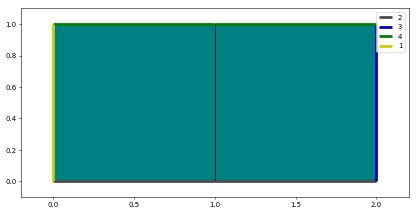

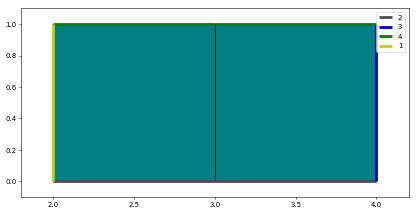

In [4]:
# select mesh to be plotted
mesh_id1 = 1
mshfile = msh_dict[mesh_id1]

m2 = amfe.Mesh()
m2.import_msh(mshfile)

m3 = m2.translation([2,0,0])


fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_mesh(m2,ax1)

fig, ax2=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_mesh(m3,ax2)
plt.show()

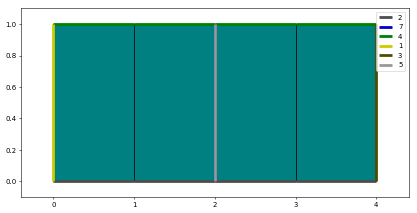

In [5]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

# append domains to MechanicalAssembly
my_system = amfe.MechanicalAssembly()

submesh1 = m2.set_domain('phys_group',domain_id[1])
submesh2 = m3.set_domain('phys_group',domain_id[1])

my_system.append_domain(submesh1, my_material, 1)
my_system.append_domain(submesh2, my_material, 2)
my_system.update_global_system()


# select submesh for interfaces
sub_int1 = my_system.get_submesh(1,3)
sub_int2 = my_system.get_submesh(2,1)
my_system.add_bonded_interface_constraint(sub_int1,sub_int2)
my_system.update_global_system()

# replacing phys tags to avoid conflict
my_system.change_domain_physical_tag(2,1,5)
my_system.change_domain_physical_tag(1,3,7)
my_system.update_global_system()


# mesh of one turbine section
m4 = my_system.get_global_mesh()

fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_mesh(m4,ax1)
plt.show()

In [6]:
my_system.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,2,2,1,1,1,None,1,0,4,NaN,NaN
1,2,2,straight_line,2,2,1,1,1,None,1,4,1,NaN,NaN
2,3,3,straight_line,2,7,2,1,1,None,1,1,2,NaN,NaN
3,4,4,straight_line,2,4,3,1,1,None,1,2,5,NaN,NaN
4,5,5,straight_line,2,4,3,1,1,None,1,5,3,NaN,NaN
5,6,6,straight_line,2,1,4,1,1,None,1,3,0,NaN,NaN
6,7,7,Quad4,2,6,1,1,1,None,1,5,3,0.0,4.0
7,8,8,Quad4,2,6,1,1,1,-2,1,5,4,1.0,2.0
8,9,1,straight_line,2,2,1,1,2,None,2,1,10,NaN,NaN
9,10,2,straight_line,2,2,1,1,2,None,2,10,7,NaN,NaN


In [7]:
# mesh of one turbine section
m5 = m4.translation([0,1,0])

submesh4 = m4.set_domain('phys_group',domain_id[1])
submesh5 = m5.set_domain('phys_group',domain_id[1])

global_system = amfe.MechanicalAssembly()
global_system.append_domain(submesh4, my_material, 1)
global_system.append_domain(submesh5, my_material, 2)
global_system.update_global_system()

# select submesh for interfaces
sub_int1 = global_system.get_submesh(1,4)
sub_int2 = global_system.get_submesh(2,2)
global_system.add_bonded_interface_constraint(sub_int1,sub_int2)
global_system.update_global_system()

new_mesh2 = global_system.get_global_mesh()
fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_mesh(new_mesh2,ax1,False)
plt.show()

TypeError: argument of type 'int' is not iterable

In [ ]:
my_comp2 = amfe.MechanicalSystem()
my_comp2.set_mesh_obj(copy.deepcopy(new_mesh2))
my_comp2.set_domain(6,my_material)
my_comp2.apply_dirichlet_boundaries(1, 'xy')
my_comp2.apply_neumann_boundaries(3, value, 'normal')
s1 = amfe.LinearStaticsSolver(my_comp2)
s1.solve()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_system_solution(my_comp2, factor=scale, ax = ax1)
    plt.show()
    
interact(plot_static,scale=(0,200,10))  

In [ ]:
u2 = np.sort(my_comp2.u_output[1])
u1 = np.sort(my_comp.u_output[1])
plt.plot(u1,u2,'o')
plt.show()

In [ ]:
# select submesh for Neumann B.C
sub_neu1 = global_system.get_submesh(2,3)
sub_neu2 = global_system.get_submesh(1,3)

# select submesh for Dirichlet
sub_dir1 = global_system.get_submesh(1,1)
sub_dir2 = global_system.get_submesh(2,1)

value = 1.0e8
global_system.apply_neumann_boundaries(sub_neu1,value)
global_system.apply_neumann_boundaries(sub_neu2,value)
global_system.apply_dirichlet_boundaries(sub_dir1,0.0,'xy')
global_system.apply_dirichlet_boundaries(sub_dir2,0.0,'xy')

global_system.update_domain()

global_system.el_df



In [ ]:
global_mesh = global_system.get_global_mesh()

fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_mesh(global_mesh ,ax1,False)
plt.show()

In [ ]:
domain = global_system
domain.split_in_partitions()

super_domain = amfe.SuperDomain(domain.groups)
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()
F, d = super_domain.assemble_F_and_d()

n_null = len(e) # null space size
n_int = len(d) # interface size
Zeros = np.zeros([n_null ,n_null])

A1 = np.hstack((F,G.T))
A2 = np.hstack((G,Zeros))

A = np.vstack((A1,A2))
b = np.concatenate((d,e))

# Dual interface problem
x = np.linalg.solve(A,b)
global_lambda = x[:n_int]
alpha = x[n_int:]

global_alpha = alpha

u = super_domain.eval_subdomain_displacement(global_lambda,alpha)

In [ ]:
global_lambda

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax1) 
          
    plt.show()

interact(plot_static,scale=(0,200,5))  

In [ ]:
my_system = copy.deepcopy(domain)
u_dual_int = amfe.FetiSolver.average_displacement_calc(my_system, super_domain.feti_subdomains_dict)
my_system.u_output.append(u_dual_int*0.0)
my_system.u_output.append(u_dual_int)

def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_system_solution(my_system, factor=scale, ax = ax1)
    #plt.xlim([-7,7])
    #plt.ylim([-7,7])
    plt.show()
    
interact(plot_static,scale=(0,200,5))  

In [ ]:
u_2 = my_comp2.u_output[1]
u_3 =u_dual_int
plt.plot(u_2,u_3,'o')
plt.show()

In [ ]:
domain.problem_type = 2
amfe.FetiSolver.linear_static(domain, directory='temp2')

In [ ]:
amfe.plot_submesh(domain.groups[1])
plt.show()

In [ ]:
# solving the project Dual interface problem
I = np.eye(n_int,n_int)
GTG = G.T.dot(G)
GGT =  G.dot(G.T)
GTe = G.T.dot(e)
P = I - G.T.dot(np.linalg.inv(GGT)).dot(G)

# Solving lamda im
lambda_im = G.T.dot(np.linalg.solve(GGT,e))

In [ ]:
r0 = d - F.dot(lambda_im)
n_int = len(r0)

GGT_inv = np.linalg.inv(GGT)
F_action = lambda x : F.dot(x)
P_action = lambda w : (np.eye(n_int) - G.T.dot(GGT_inv).dot(G)).dot(w)

lambda_ker, last_res, proj_r_hist, lambda_hist = amfe.PCGP(F_action,r0,P_action)
lambda_sol =  lambda_im + lambda_ker

dtil = d - F_action(lambda_sol)
alpha_pgc = np.linalg.solve(GGT,G.dot(dtil))
u = super_domain.eval_subdomain_displacement(lambda_sol,alpha_pgc)

In [ ]:
def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax1) 
          
    plt.show()

interact(plot_static,scale=(0,200,5))

In [ ]:
plt.plot(np.sort(lambda_sol),np.sort(global_lambda),'o')
plt.show()

In [ ]:
def PCGP(F,dhat,lambda_ker,Precond=None,tol=1.e-6,max_int = 500, save_arnold=False):
    # step 1
    beta = 0.0
    rk = dhat
    interface_size = lambda_ker.shape[0]
    lambda_ker = np.zeros(interface_size)
    
    if Precond is None:
        Precond = np.eye(interface_size,interface_size)

    alpha_list = []
    beta_list = []
    Q_list = []
    #step 2
    yk2 = np.zeros(interface_size)
    yk1 = np.zeros(interface_size)
    wk1 = np.zeros(interface_size)

    res = []
    for k in range(max_int):
        wk = P.dot(rk)

        norm_wk = np.linalg.norm(wk)
        res.append(norm_wk)
        if norm_wk<tol:
            print('PCG has converged after %i' %(k+1))
            break

        zk = Precond.dot(wk)
        yk = P.dot(zk)

        if k>1:
            #calc beta
            beta = yk.T.dot(wk)/yk1.T.dot(wk1)
        else:
            pk1 = yk

        pk = yk + beta*pk1
        Fpk = F.dot(pk)
        ak = yk.T.dot(wk)/pk.T.dot(Fpk)
        lambda_ker = lambda_ker + ak*pk
        
        #store pass data
        alpha_list.append(yk.T.dot(wk))
        beta_list.append(norm_wk)
        Q_list.append(wk)
        
        rk = rk - ak*Fpk
        
        # set n - 1 data
        yk1 = yk
        pk1 = pk
        wk1 = wk


    lambda_pgc = lambda_ker + lambda_im
    
    if save_arnold:
        return lambda_pgc, res, alpha_list,beta_list,Q_list

    return lambda_pgc, res

P = I - G.T.dot(np.linalg.inv(GGT)).dot(G)
dhat = d - F_action.dot(lambda_im)
lambda_pgc, res = PCGP(F_action,dhat,lambda_ker)
dtil = d - F_action(lambda_pgc)

alpha_pgc = np.linalg.solve(GGT,G.dot(dtil))
u = super_domain.eval_subdomain_displacement(lambda_pgc,alpha_pgc)

In [ ]:
def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 50, facecolor='w', edgecolor='k')
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax1) 
          
    plt.show()

interact(plot_static,scale=(0,200,5))

In [ ]:
global_lambda